## Sim Demo

### Imports

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from env.imports import *

In [11]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn


<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [12]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 2.5%
RAM Usage: 4.5%
Available RAM: 961.6G
Total RAM: 1007.0G
52.4G


In [13]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 0


In [14]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0


ValueError: invalid literal for int() with base 10: 'No devices were found'

In [15]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome_PCA
processing_type:  None
features ['transcriptome_PCA']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: wpzpe48d
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/wpzpe48d
Initialized sweep with ID: wpzpe48d


  warnings.warn(

  warnings.warn(

  warnings.warn(



2
3
4
BEST CONFIG {'input_dim': 54, 'binarize': False, 'n_components': 25, 'max_iter': 1000, 'scale': True, 'optimize_encoder': False, 'learning_rate': 0.0035, 'batch_size': 512, 'weight_decay': 0.01, 'epochs': 100}
X_train shape: torch.Size([341, 27])
Y_train shape: torch.Size([341, 341])
Total number of parameters: 2027
Using device: cpu
Best val loss so far at epoch 1: 4.7521
Best val loss so far at epoch 2: 1.6502
Best val loss so far at epoch 3: 0.8460
Best val loss so far at epoch 4: 0.5363
Best val loss so far at epoch 5: 0.3761
Epoch 5/100, Train Loss: 0.4032, Val Loss: 0.3761, Time: 2.20s
Best val loss so far at epoch 6: 0.2778
Best val loss so far at epoch 8: 0.1525
Best val loss so far at epoch 9: 0.1224
Best val loss so far at epoch 10: 0.1107
Epoch 10/100, Train Loss: 0.1014, Val Loss: 0.1107, Time: 1.78s
Best val loss so far at epoch 11: 0.1030
Best val loss so far at epoch 12: 0.0709
Epoch 15/100, Train Loss: 0.0607, Val Loss: 0.1669, Time: 1.79s
Epoch 20/100, Train Loss

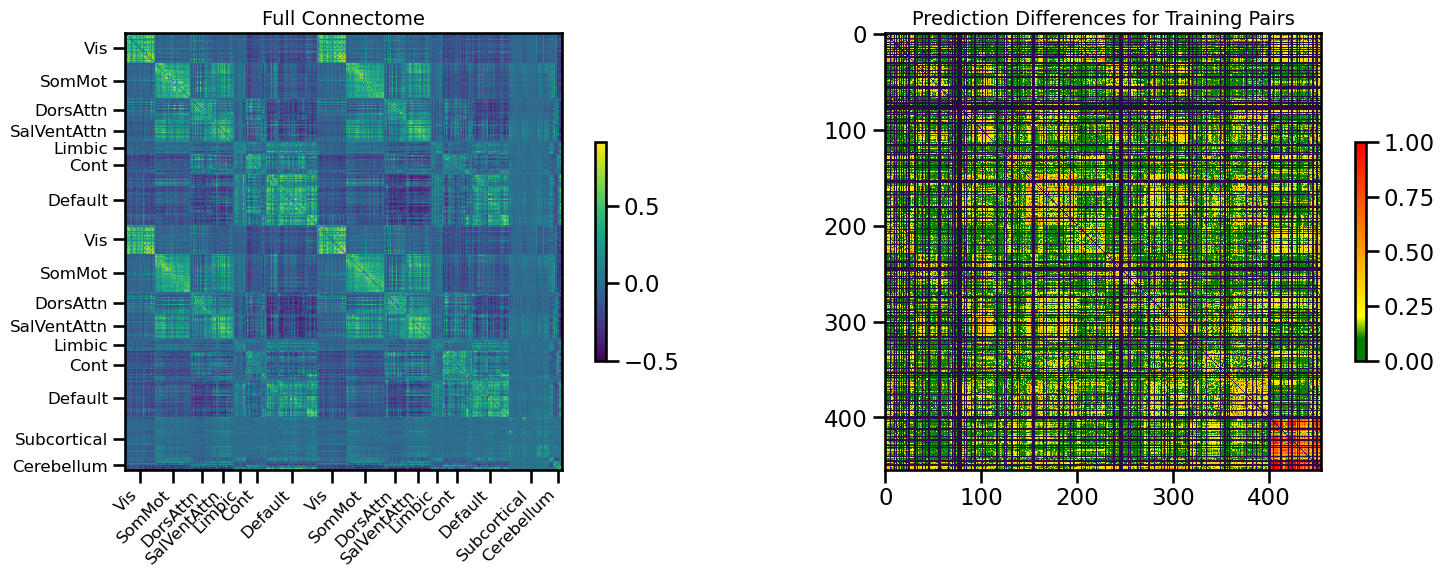

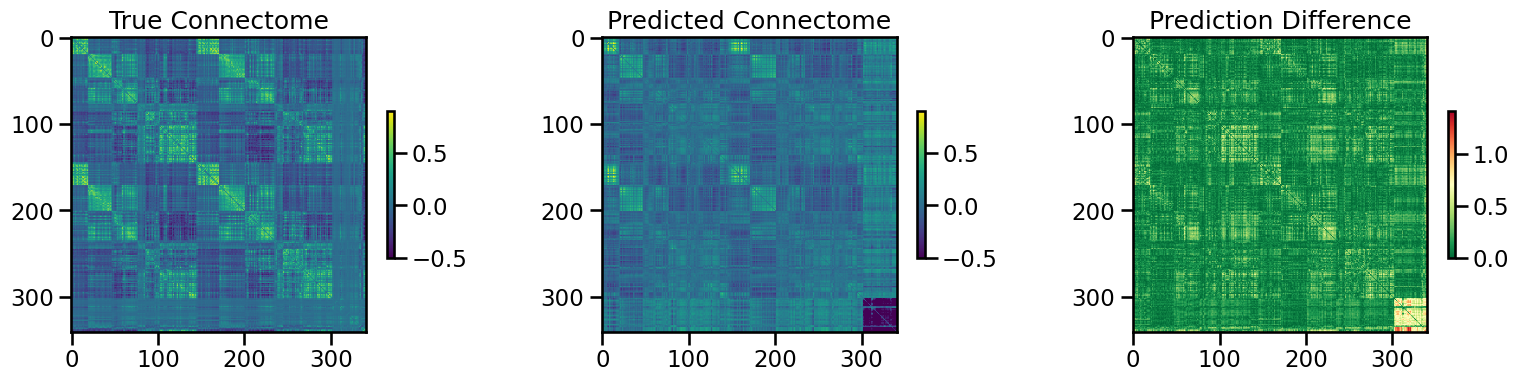

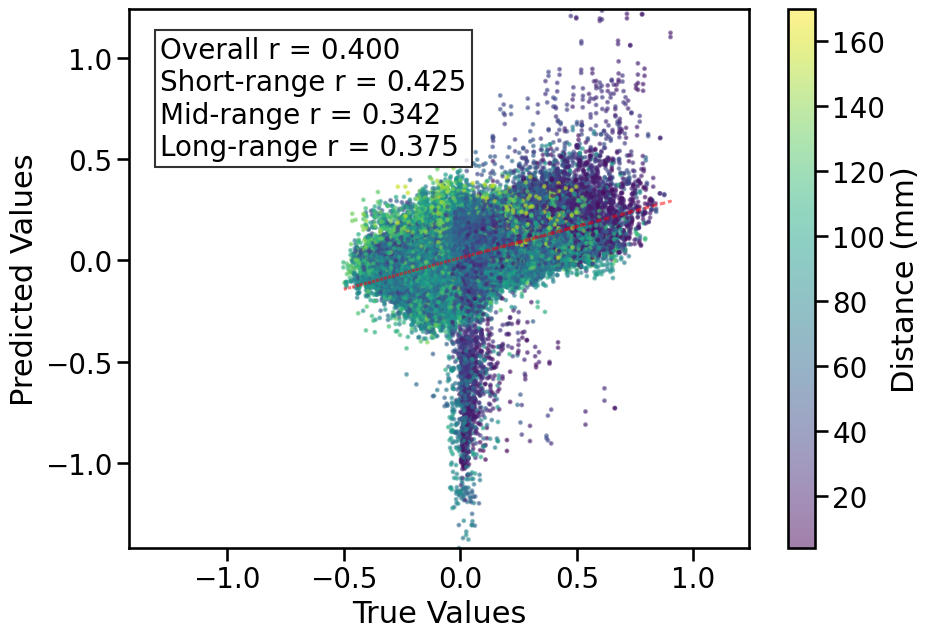

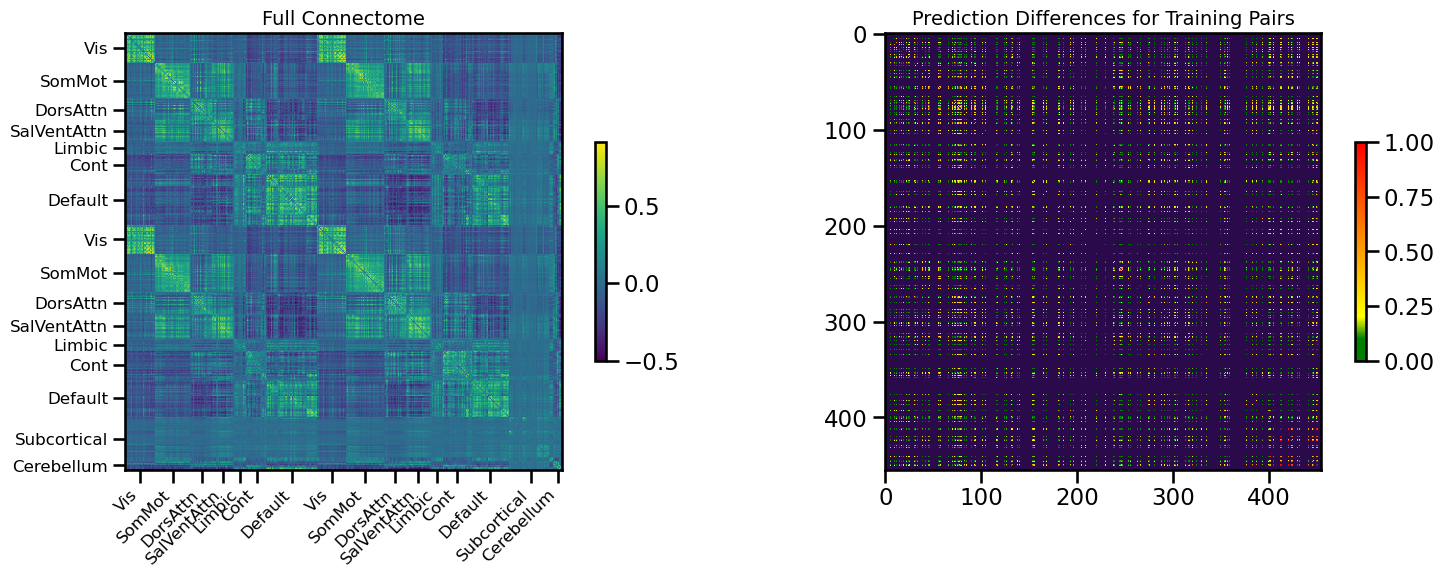

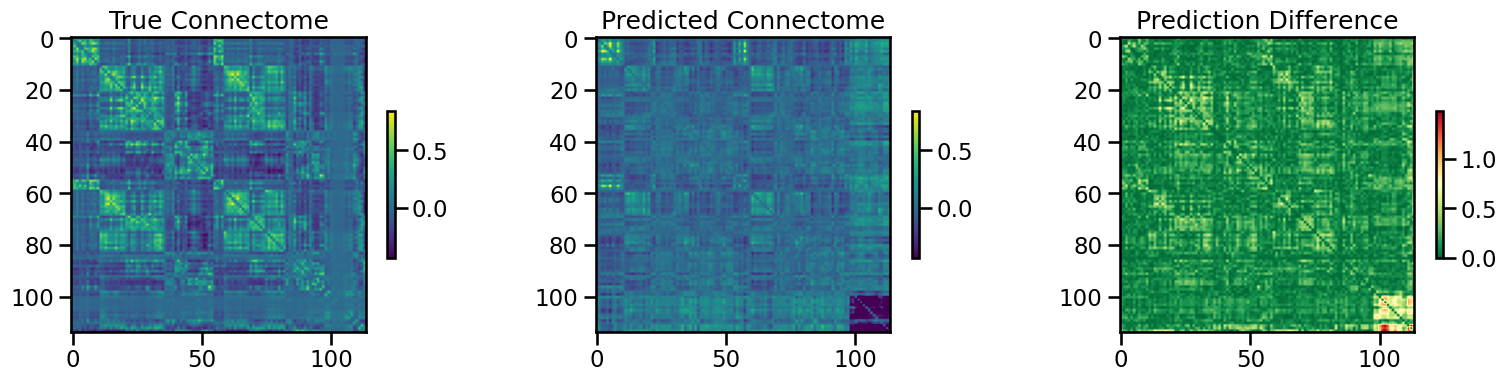

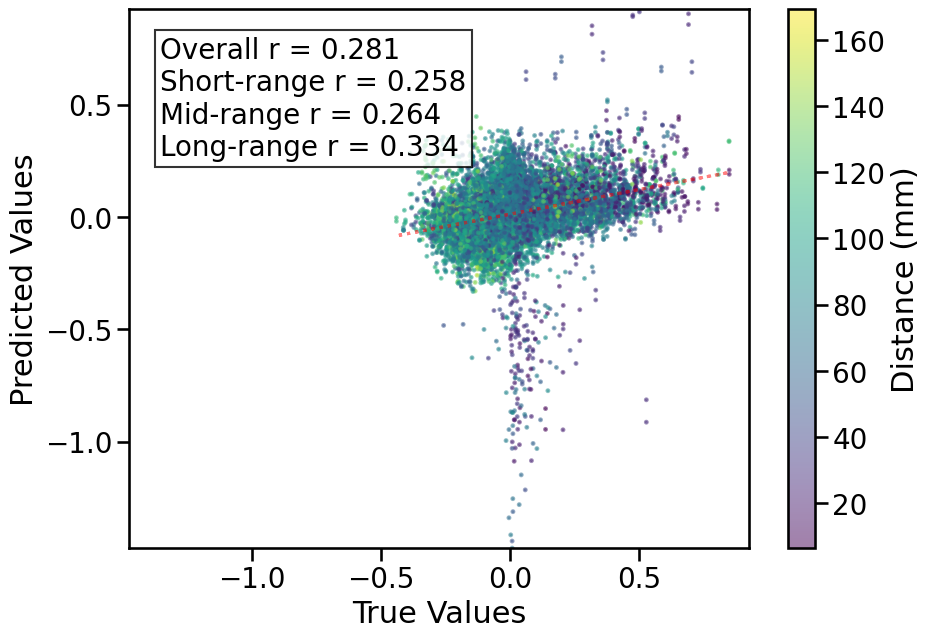


TRAIN METRICS: {'mse': 0.03322912, 'mae': 0.13445646, 'r2': 0.019095862990858747, 'pearson_r': 0.39996844378266394, 'short_r': 0.4253805174386431, 'mid_r': 0.34204180862638955, 'long_r': 0.37471110879160585, 'geodesic_distance': 29.281183824044998}
TEST METRICS: {'mse': 0.03832481, 'mae': 0.14335191, 'r2': -0.1706093335549712, 'pearson_r': 0.2810099741711331, 'short_r': 0.2575293733915972, 'mid_r': 0.263781281443391, 'long_r': 0.33390028262718546, 'geodesic_distance': 17.927138592396048}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'binarize': False, 'optimize_encoder': False, 'batch_size': 512, 'epochs': 100}
logged inner CV for first fold
CPU Usage: 3.1%
RAM Usage: 3.4%
Available RAM: 972.8G
Total RAM: 1007.0G


ValueError: invalid literal for int() with base 10: 'No devices were found'

In [17]:
single_sim_run(
              feature_type=[{'transcriptome_PCA': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              null_model='none',
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 1),
              track_wandb=False,
              skip_cv=True,
              model_type='pls_bilineardecoder',
              use_gpu=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: vjcjw8uu
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/vjcjw8uu
Initialized sweep with ID: vjcjw8uu
2
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'n_components': 25, 'max_iter': 1000, 'scale': True, 'optimize_encoder': False, 'hidden_dims': [128, 64], 'learning_rate': 9e-05, 'batch_size': 512, 'dropout_rate': 0.2, 'weight_decay': 0.0001, 'epochs': 75}
X_train shape: torch.Size([341, 7380])
Y_train shape: torch.Size([341, 341])


  warnings.warn(

  warnings.warn(

  warnings.warn(



Total number of parameters: 384233
Using device: cpu
Best val loss so far at epoch 1: 0.0510
Best val loss so far at epoch 2: 0.0379
Best val loss so far at epoch 3: 0.0329
Best val loss so far at epoch 4: 0.0284
Best val loss so far at epoch 5: 0.0269
Epoch 5/75, Train Loss: 0.0576, Val Loss: 0.0269, Time: 3.32s
Best val loss so far at epoch 6: 0.0259
Best val loss so far at epoch 7: 0.0248
Best val loss so far at epoch 8: 0.0239
Best val loss so far at epoch 9: 0.0231
Best val loss so far at epoch 10: 0.0224
Epoch 10/75, Train Loss: 0.0284, Val Loss: 0.0224, Time: 3.49s
Best val loss so far at epoch 11: 0.0216
Best val loss so far at epoch 12: 0.0210
Best val loss so far at epoch 13: 0.0204
Best val loss so far at epoch 14: 0.0200
Best val loss so far at epoch 15: 0.0196
Epoch 15/75, Train Loss: 0.0209, Val Loss: 0.0196, Time: 3.35s
Best val loss so far at epoch 16: 0.0191
Best val loss so far at epoch 17: 0.0189
Best val loss so far at epoch 18: 0.0184
Best val loss so far at epoch 

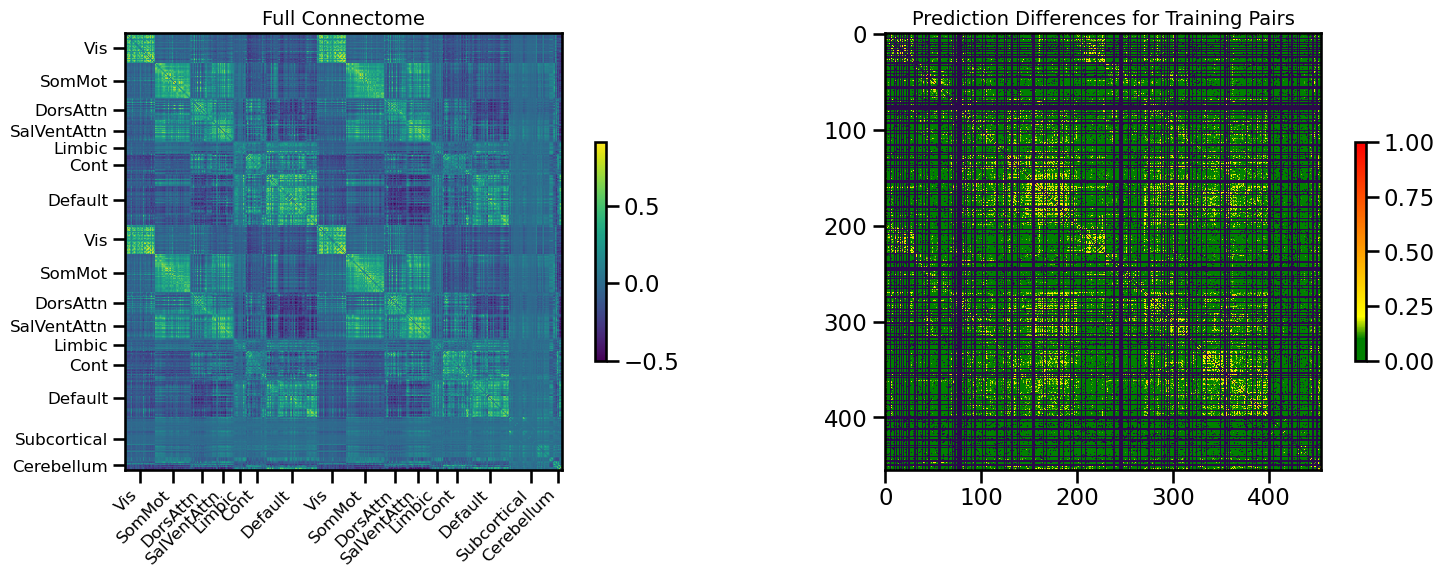

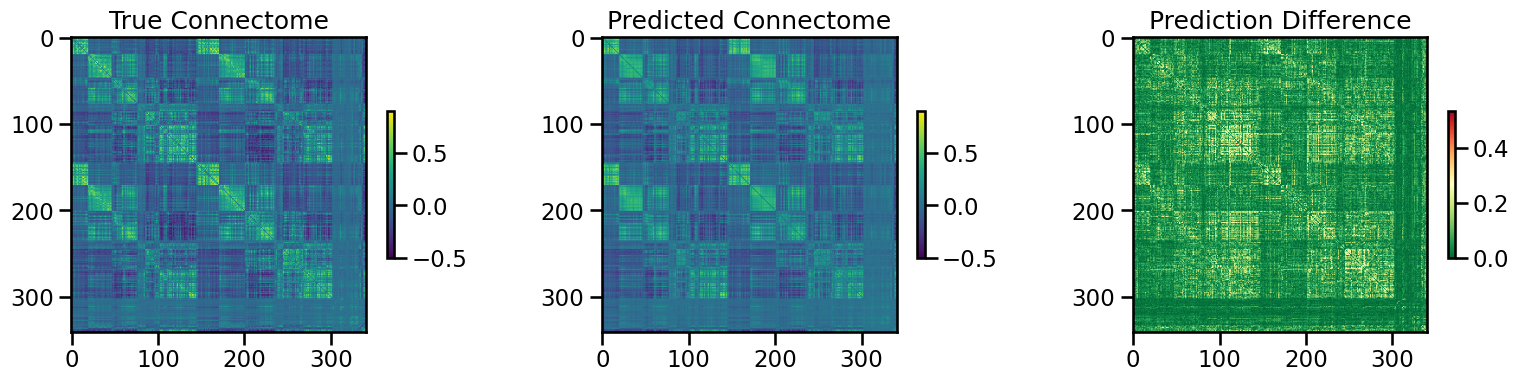

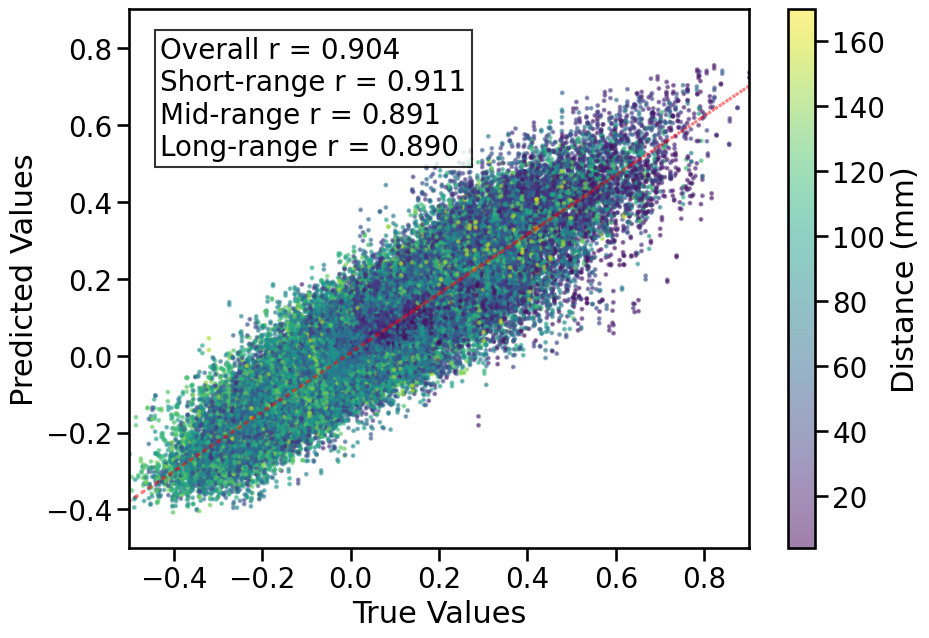

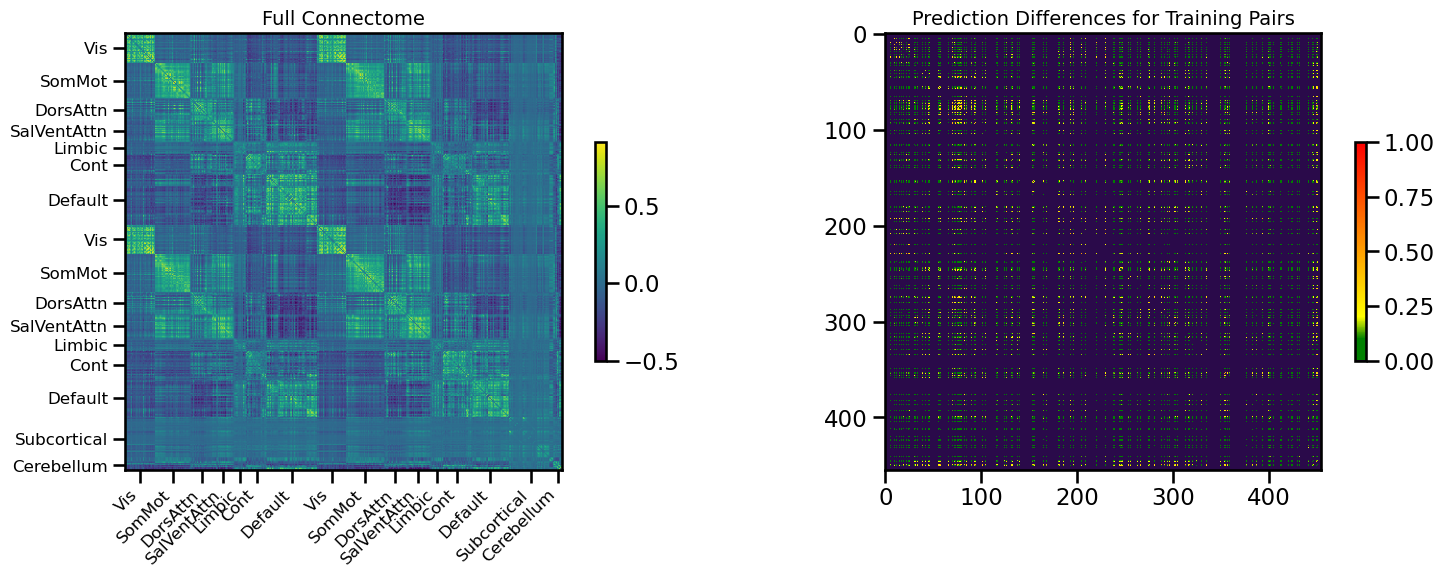

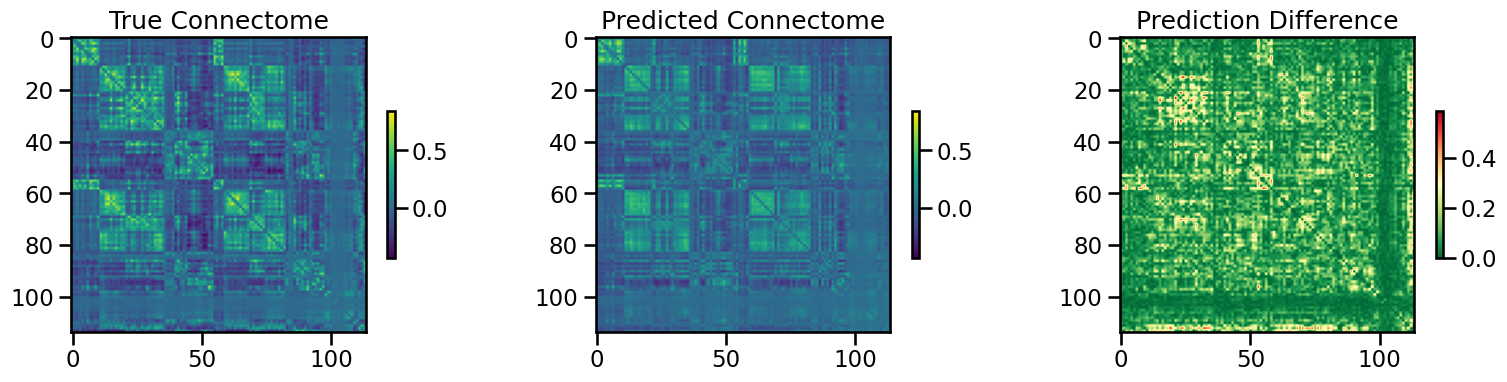

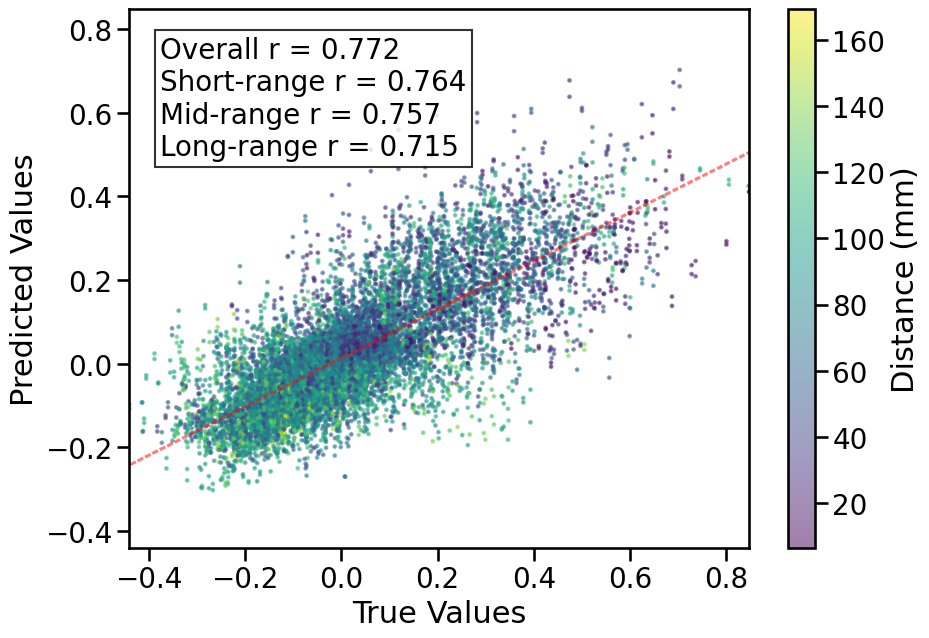


TRAIN METRICS: {'mse': 0.006305304, 'mae': 0.057151873, 'r2': 0.8138711038734652, 'pearson_r': 0.9038195401542465, 'short_r': 0.9105314184833052, 'mid_r': 0.8911290212275464, 'long_r': 0.8904043789748828, 'geodesic_distance': 19.491058779830187}
TEST METRICS: {'mse': 0.013270747, 'mae': 0.08245394, 'r2': 0.5946526189747403, 'pearson_r': 0.7715864218552042, 'short_r': 0.7638530924023088, 'mid_r': 0.7570406661343989, 'long_r': 0.7150437000499017, 'geodesic_distance': 11.754971262892775}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'binarize': False, 'optimize_encoder': False, 'batch_size': 512, 'epochs': 75}
logged inner CV for first fold
CPU Usage: 2.5%
RAM Usage: 5.7%
Available RAM: 949.9G
Total RAM: 1007.0G


ValueError: invalid literal for int() with base 10: 'No devices were found'

In [19]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              null_model='none',
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 1),
              track_wandb=False,
              skip_cv=True,
              model_type='pls_mlpdecoder',
              use_gpu=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()